# Preprocessing

In [1]:
import pandas as pd

# Get all datasets
newdata = pd.read_csv('Network_dataset_10.csv')
newdata2 = pd.read_csv('Network_dataset_17.csv')
newdata3 = pd.read_csv('Network_dataset_2.csv')
newdata4 = pd.read_csv('Network_dataset_19.csv')
#newdata5 = pd.read_csv('Network_dataset_22.csv')

# Merge the datasets
premergedData = [newdata, newdata2, newdata3, newdata4]
mergedData = pd.concat(premergedData)

# Remove the timestamp column from these datasets
mergedData2 = mergedData.drop('ts', axis=1)

# Get train-test dataset
newdata6 = pd.read_csv('train_test_network.csv')

# Create giant dataset
predf = [mergedData2, newdata6]
df = pd.concat(premergedData)


In [2]:
df

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1556145104,192.168.1.30,3050,192.168.1.194,3050,tcp,-,0.000074,0,0,...,0,0,-,-,-,-,-,-,1,dos
1,1556145104,192.168.1.30,3050,192.168.1.194,3050,tcp,-,0.000010,0,0,...,0,0,-,-,-,-,-,-,1,dos
2,1556145104,192.168.1.30,3050,192.168.1.194,3050,tcp,-,0.000014,0,0,...,0,0,-,-,-,-,-,-,1,dos
3,1556145104,192.168.1.30,3050,192.168.1.193,3050,tcp,-,0.000014,0,0,...,0,0,-,-,-,-,-,-,1,dos
4,1556145104,192.168.1.30,3050,192.168.1.194,3050,tcp,-,0.000018,0,0,...,0,0,-,-,-,-,-,-,1,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1556328317,192.168.1.32,56976,192.168.1.195,80,tcp,http,0.873924,86,2009,...,0,0,-,-,-,-,-,-,1,password
999996,1556328317,192.168.1.32,56982,192.168.1.195,80,tcp,http,0.797518,86,2009,...,0,0,-,-,-,-,-,-,1,password
999997,1556328317,192.168.1.33,51082,192.168.1.190,80,tcp,http,0.002067,153,543,...,0,0,-,-,-,-,-,-,1,password
999998,1556328317,192.168.1.33,51080,192.168.1.190,80,tcp,http,0.002944,155,651,...,0,0,-,-,-,-,-,-,1,password


In [3]:
# Define features to drop, including IP addresses, ports, and other specified features
features_to_drop = ['src_ip', 'dst_ip', 'src_port', 'service','dst_port', 'ssl_version', 'ssl_cipher', 'ssl_subject', 'ssl_issuer','dns_query','dns_qclass','dns_qtype','dns_rcode','http_request_body_len','http_version', 'http_trans_depth','http_method','http_uri','http_response_body_len','http_status_code','http_user_agent','http_orig_mime_types','http_resp_mime_types','weird_name','weird_addl','weird_notice', 'ts']
df = df.drop(columns=features_to_drop)

# Exclude 'type' from the list of categorical columns for encoding
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_cols.remove('type')  # Exclude 'type' column

# Fill missing numeric values with the median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Fill missing categorical values with the mode (excluding 'type')
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Encode the categorical variables (excluding 'type')
df = pd.get_dummies(df, columns=categorical_cols)

# Now, 'type' is not altered and is ready to be used as the target variable for model training.

# Proceed with scaling the numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Your dataset is now ready for training and testing the model.

# After preprocessing your training data
trained_columns = df.columns.tolist()
trained_columns = list(dict.fromkeys(trained_columns))

In [4]:
def preprocess_df(df, trained_columns):
    # Define features to drop, including IP addresses, ports, and other specified features
    features_to_drop = ['src_ip', 'dst_ip', 'src_port', 'service','dst_port', 'ssl_version', 'ssl_cipher', 'ssl_subject', 'ssl_issuer','dns_query','dns_qclass','dns_qtype','dns_rcode','http_request_body_len','http_version', 'http_trans_depth','http_method','http_uri','http_response_body_len','http_status_code','http_user_agent','http_orig_mime_types','http_resp_mime_types','weird_name','weird_addl','weird_notice']
    df = df.drop(columns=features_to_drop)

    # Exclude 'type' from the list of categorical columns for encoding
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    categorical_cols.remove('type')  # Exclude 'type' column

    # Fill missing numeric values with the median
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

    # Fill missing categorical values with the mode (excluding 'type')
    df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

    # Encode the categorical variables (excluding 'type')
    df = pd.get_dummies(df, columns=categorical_cols)
    df = df.reindex(columns=trained_columns, fill_value=0)


    # Now, 'type' is not altered and is ready to be used as the target variable for model training.

    # Proceed with scaling the numeric features
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # Your dataset is now ready for training and testing the model.

    return df

In [5]:
df

,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label,type,...,dns_rejected_-,dns_rejected_F,dns_rejected_T,ssl_resumed_-,ssl_resumed_F,ssl_established_-,ssl_established_F,ssl_established_T,http_referrer_-,http_referrer_http://192.168.1.195/dvwa/vulnerabilities/brute/
0,-0.245653,-0.050281,-0.029364,-0.014557,-0.055893,-0.007626,-0.025587,-0.020778,0.144793,dos,...,True,False,False,True,False,True,False,False,True,False
1,-0.245654,-0.050281,-0.029364,-0.014557,-0.055893,-0.007626,-0.025587,-0.020778,0.144793,dos,...,True,False,False,True,False,True,False,False,True,False
2,-0.245654,-0.050281,-0.029364,-0.014557,-0.055893,-0.007626,-0.025587,-0.020778,0.144793,dos,...,True,False,False,True,False,True,False,False,True,False
3,-0.245654,-0.050281,-0.029364,-0.014557,-0.055893,-0.007626,-0.025587,-0.020778,0.144793,dos,...,True,False,False,True,False,True,False,False,True,False
4,-0.245654,-0.050281,-0.029364,-0.014557,-0.055893,-0.007626,-0.025587,-0.020778,0.144793,dos,...,True,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-0.225409,-0.050276,-0.029318,-0.014557,0.021615,0.002610,0.092431,0.084345,0.144793,password,...,True,False,False,True,False,True,False,False,True,False
999996,-0.227179,-0.050276,-0.029318,-0.014557,0.021615,0.002610,0.092431,0.084345,0.144793,password,...,True,False,False,True,False,True,False,False,True,False
999997,-0.245607,-0.050273,-0.029352,-0.014557,0.006113,0.005119,0.068828,0.015715,0.144793,password,...,True,False,False,True,False,True,False,False,True,False
999998,-0.245586,-0.050273,-0.029349,-0.014557,0.006113,0.005186,0.068828,0.020826,0.144793,password,...,True,False,False,True,False,True,False,False,True,False


# Training model

In [6]:
from sklearn.model_selection import train_test_split

# Separate the features (X) from the target variable (y)
X = df.drop('type', axis=1)  # Features
y = df['type']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the splits
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

Training set size: 3200000 rows
Testing set size: 800000 rows


In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy')

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Display a message to confirm training completion
print("Decision Tree model training completed.")

Decision Tree model training completed.


In [8]:
X_test

,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label,proto_icmp,...,dns_rejected_-,dns_rejected_F,dns_rejected_T,ssl_resumed_-,ssl_resumed_F,ssl_established_-,ssl_established_F,ssl_established_T,http_referrer_-,http_referrer_http://192.168.1.195/dvwa/vulnerabilities/brute/
49554,0.479145,-0.050281,-0.029364,-0.014557,-0.024890,-0.003478,-0.001983,-0.016991,0.144793,False,...,True,False,False,True,False,True,False,False,True,False
214510,-0.245654,-0.050281,-0.029364,-0.014557,-0.055893,-0.007626,-0.025587,-0.020778,0.144793,False,...,True,False,False,True,False,True,False,False,True,False
145764,-0.245654,-0.050281,-0.029364,-0.014557,-0.055893,-0.007359,-0.049191,-0.022671,0.144793,False,...,True,False,False,True,False,True,False,False,True,False
198867,-0.245654,-0.050281,-0.029364,-0.014557,-0.055893,-0.007359,-0.049191,-0.022671,0.144793,False,...,True,False,False,True,False,True,False,False,True,False
184366,-0.245643,-0.050281,-0.029364,-0.014557,-0.040392,-0.005218,-0.025587,-0.019831,0.144793,False,...,True,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257093,-0.232070,-0.050276,-0.029318,-0.014557,0.021615,0.002610,0.092431,0.084345,0.144793,False,...,True,False,False,True,False,True,False,False,True,False
973002,1.179164,-0.050281,-0.029364,-0.014557,-0.024890,-0.003478,-0.001983,-0.017370,0.144793,False,...,True,False,False,True,False,True,False,False,True,False
250857,-0.245129,-0.050273,-0.029342,-0.014557,0.006113,0.003580,0.045224,0.031760,0.144793,False,...,True,False,False,True,False,True,False,False,True,False
972218,-0.245651,-0.050281,-0.029364,-0.014557,-0.055893,-0.007626,-0.025587,-0.020778,0.144793,False,...,True,False,False,True,False,True,False,False,True,False


In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set
y_pred = dt_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model on the test set: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy of the Decision Tree model on the test set: 1.00
Classification Report:
               precision    recall  f1-score   support

        ddos       1.00      0.99      1.00    193275
         dos       1.00      1.00      1.00    193839
      normal       1.00      1.00      1.00     16195
    password       0.99      1.00      1.00    197635
    scanning       1.00      1.00      1.00    199056

    accuracy                           1.00    800000
   macro avg       1.00      1.00      1.00    800000
weighted avg       1.00      1.00      1.00    800000



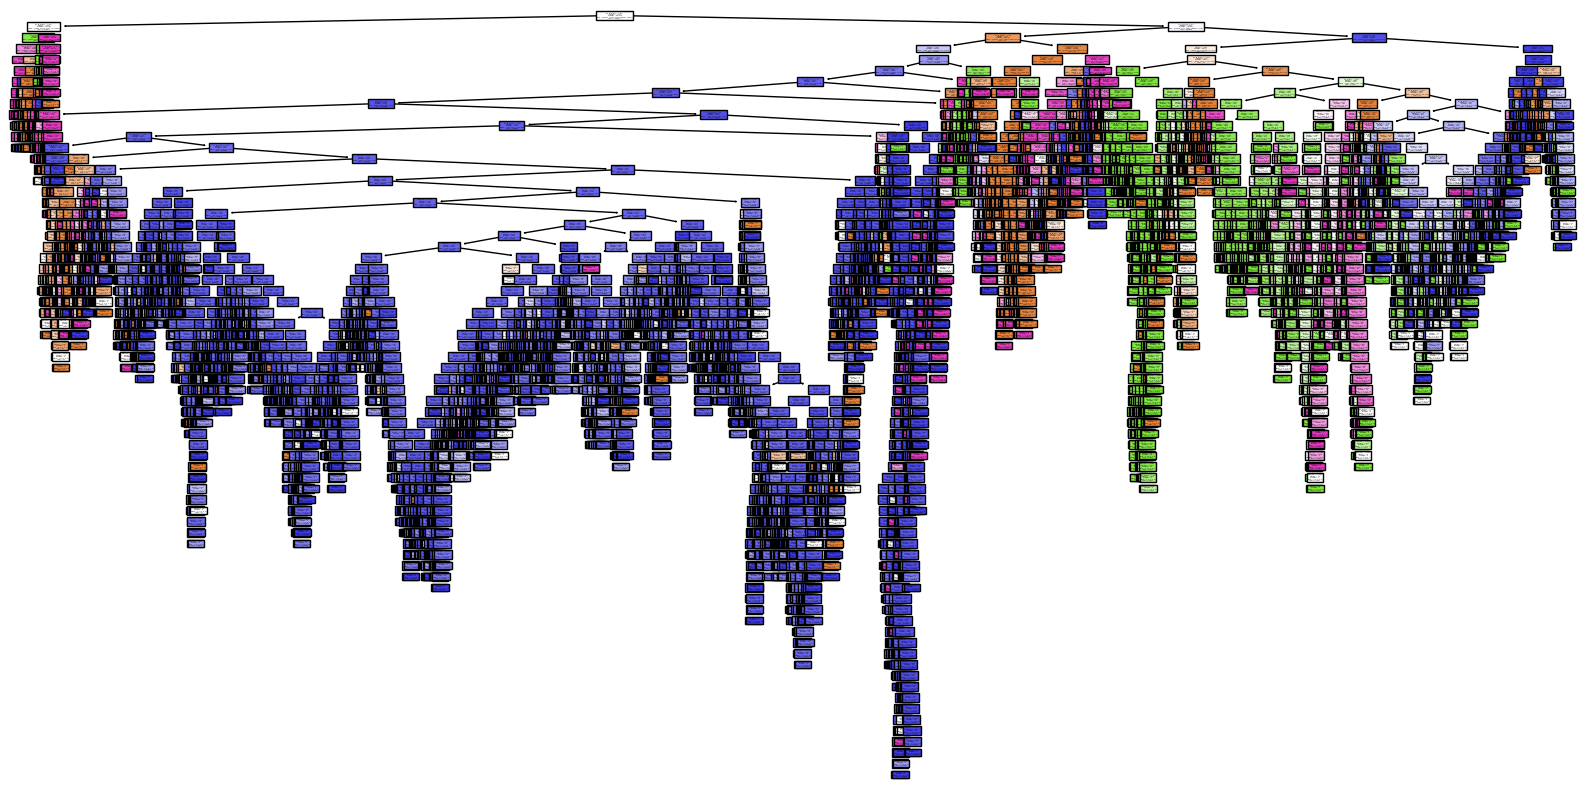

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()

## Testing the model on new data

The following datasets can be found on processed network dataset located in the TON_IoT link in [this UNSW webpage](https://research.unsw.edu.au/projects/unsw-nb15-dataset)

##### Network_dataset_14 contains instances of normal traffic and ddos attacks

In [11]:
newdata = pd.read_csv('Network_dataset_14.csv')

newdata2 = newdata.drop('ts', axis=1)

new_data_preprocessed = preprocess_df(newdata2, trained_columns)

X_new_data = new_data_preprocessed.drop('type', axis=1)
y_new = new_data_preprocessed['type']

y_new_data = dt_classifier.predict(X_new_data)

new_accuracy = accuracy_score(y_new, y_new_data)

print(f"Accuracy of the Decision Tree model on the test set: {new_accuracy:.2f}")

# Generate a classification report
new_report = classification_report(y_new, y_new_data)
print("Classification Report:\n", new_report)

Accuracy of the Decision Tree model on the test set: 0.15


C:\Users\jaero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jaero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

        ddos       1.00      0.15      0.26    999417
         dos       0.00      0.00      0.00         0
      normal       1.00      1.00      1.00       583
    password       0.00      0.00      0.00         0
    scanning       0.00      0.00      0.00         0

    accuracy                           0.15   1000000
   macro avg       0.40      0.23      0.25   1000000
weighted avg       1.00      0.15      0.26   1000000



C:\Users\jaero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Network_dataset_23 contains instances of normal traffic and backdoor attacks

In [13]:
newdata = pd.read_csv('Network_dataset_23.csv')

newdata2 = newdata.drop('ts', axis=1)

new_data_preprocessed = preprocess_df(newdata2, trained_columns)

X_new_data = new_data_preprocessed.drop('type', axis=1)
y_new = new_data_preprocessed['type']

y_new_data = dt_classifier.predict(X_new_data)

new_accuracy = accuracy_score(y_new, y_new_data)

print(f"Accuracy of the Decision Tree model on the test set: {new_accuracy:.2f}")

# Generate a classification report
new_report = classification_report(y_new, y_new_data)
print("Classification Report:\n", new_report)

C:\Users\jaero\AppData\Local\Temp\ipykernel_20032\4114822519.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  newdata = pd.read_csv('Network_dataset_23.csv')


ValueError: cannot reindex on an axis with duplicate labels